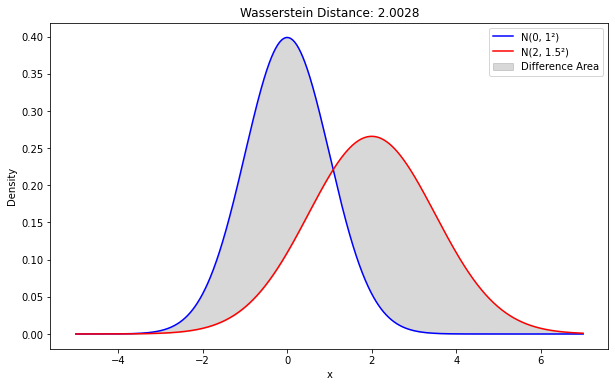

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, wasserstein_distance

# Parameters for two normal distributions
mu1, sigma1 = 0, 1   # Mean and standard deviation for distribution 1
mu2, sigma2 = 2, 1.5 # Mean and standard deviation for distribution 2

# Generate samples
x = np.linspace(-5, 7, 1000)
y1 = norm.pdf(x, mu1, sigma1)
y2 = norm.pdf(x, mu2, sigma2)

# Calculate Wasserstein Distance
samples1 = np.random.normal(mu1, sigma1, 10000)
samples2 = np.random.normal(mu2, sigma2, 10000)
wasserstein_dist = wasserstein_distance(samples1, samples2)

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label=f'N({mu1}, {sigma1}²)', color='blue')
plt.plot(x, y2, label=f'N({mu2}, {sigma2}²)', color='red')
plt.fill_between(x, y1, y2, color='gray', alpha=0.3, label='Difference Area')

# Add Wasserstein distance annotation
plt.title(f'Wasserstein Distance: {wasserstein_dist:.4f}')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

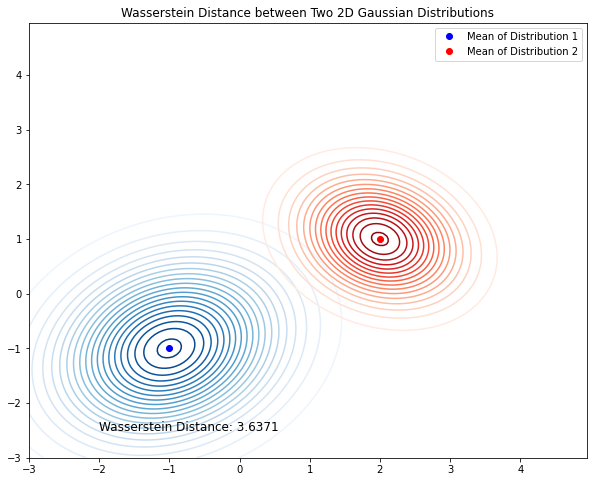

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.linalg import sqrtm

# Parameters for the first 2D Gaussian distribution
mean1 = [-1, -1]
cov1 = np.array([[1, 0.2], [0.2, 1]])

# Parameters for the second 2D Gaussian distribution
mean2 = [2, 1]
cov2 = np.array([[0.5, -0.1], [-0.1, 0.5]])

# Create a grid for visualization
x, y = np.mgrid[-3:5:.05, -3:5:.05]
pos = np.dstack((x, y))

# Evaluate the Gaussian distributions on the grid
rv1 = multivariate_normal(mean1, cov1)
rv2 = multivariate_normal(mean2, cov2)
z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)

# Compute Wasserstein-2 Distance
mean_diff = np.linalg.norm(np.array(mean1) - np.array(mean2))

try:
    # Compute the square root of cov1
    cov1_sqrt = sqrtm(cov1)
    if np.iscomplexobj(cov1_sqrt):
        cov1_sqrt = cov1_sqrt.real  # Remove small imaginary components
    
    # Compute middle term
    cov_mid = np.dot(cov1_sqrt, np.dot(cov2, cov1_sqrt))
    cov_mid_sqrt = sqrtm(cov_mid)
    if np.iscomplexobj(cov_mid_sqrt):
        cov_mid_sqrt = cov_mid_sqrt.real  # Remove small imaginary components
    
    # Trace term calculation
    trace_term = np.trace(cov1 + cov2 - 2 * cov_mid_sqrt)
    wasserstein_dist = np.sqrt(mean_diff**2 + trace_term)
except Exception as e:
    print("Error in Wasserstein distance calculation:", e)
    wasserstein_dist = np.nan

# Plotting the 2D Gaussian distributions
fig, ax = plt.subplots(figsize=(10, 8))
contour1 = ax.contour(x, y, z1, levels=20, cmap='Blues')
contour2 = ax.contour(x, y, z2, levels=20, cmap='Reds')

# Plot means
ax.plot(*mean1, 'bo', label='Mean of Distribution 1')
ax.plot(*mean2, 'ro', label='Mean of Distribution 2')

# Annotate Wasserstein Distance
ax.text(-2, -2.5, f'Wasserstein Distance: {wasserstein_dist:.4f}', fontsize=12, color='black')

plt.title('Wasserstein Distance between Two 2D Gaussian Distributions')
plt.legend()
plt.show()


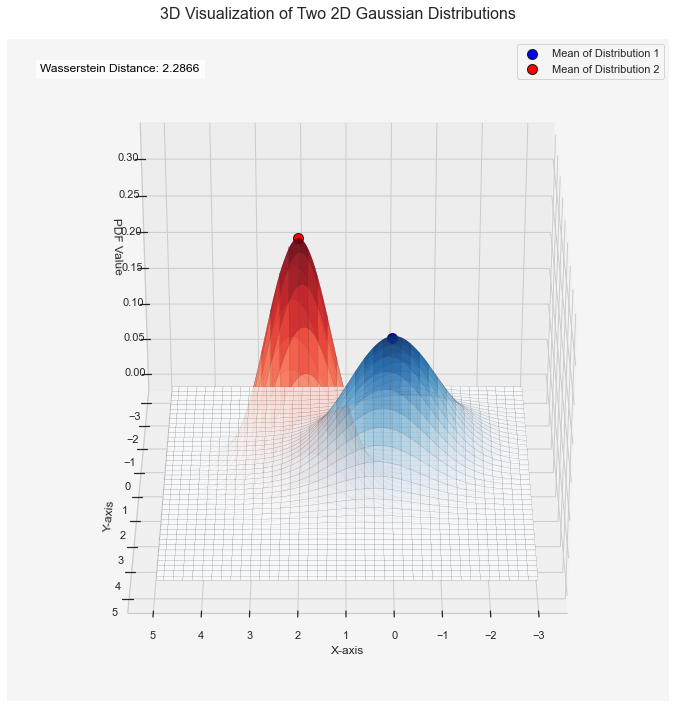

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal
from scipy.linalg import sqrtm

# Set Seaborn style for aesthetics
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})

# Parameters for the first 2D Gaussian distribution
mean1 = [0, 0]
cov1 = np.array([[1, 0.2], [0.2, 1]])

# Parameters for the second 2D Gaussian distribution
mean2 = [2, 1]
cov2 = np.array([[0.5, -0.1], [-0.1, 0.5]])

# Create a grid for visualization
x, y = np.mgrid[-3:5:.05, -3:5:.05]
pos = np.dstack((x, y))

# Evaluate the Gaussian distributions on the grid
rv1 = multivariate_normal(mean1, cov1)
rv2 = multivariate_normal(mean2, cov2)
z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)

# Compute Wasserstein-2 Distance
mean_diff = np.linalg.norm(np.array(mean1) - np.array(mean2))

try:
    # Compute the square root of cov1
    cov1_sqrt = sqrtm(cov1)
    if np.iscomplexobj(cov1_sqrt):
        cov1_sqrt = cov1_sqrt.real  # Remove small imaginary components
    
    # Compute middle term
    cov_mid = np.dot(cov1_sqrt, np.dot(cov2, cov1_sqrt))
    cov_mid_sqrt = sqrtm(cov_mid)
    if np.iscomplexobj(cov_mid_sqrt):
        cov_mid_sqrt = cov_mid_sqrt.real  # Remove small imaginary components
    
    # Trace term calculation
    trace_term = np.trace(cov1 + cov2 - 2 * cov_mid_sqrt)
    wasserstein_dist = np.sqrt(mean_diff**2 + trace_term)
except Exception as e:
    print("Error in Wasserstein distance calculation:", e)
    wasserstein_dist = np.nan

# Plotting with Seaborn and Matplotlib
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Surface plot for the first Gaussian
ax.plot_surface(
    x, y, z1, cmap='Blues', alpha=0.7, edgecolor='k', linewidth=0.1, antialiased=True
)

# Surface plot for the second Gaussian
ax.plot_surface(
    x, y, z2, cmap='Reds', alpha=0.7, edgecolor='k', linewidth=0.1, antialiased=True
)

# Scatter means
ax.scatter(mean1[0], mean1[1], np.max(z1), color='blue', s=100, label='Mean of Distribution 1', edgecolor='k')
ax.scatter(mean2[0], mean2[1], np.max(z2), color='red', s=100, label='Mean of Distribution 2', edgecolor='k')

# Annotate Wasserstein Distance
ax.text2D(
    0.05, 0.95, f'Wasserstein Distance: {wasserstein_dist:.4f}',
    transform=ax.transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7)
)

# Customize plot appearance
ax.set_title('3D Visualization of Two 2D Gaussian Distributions', fontsize=16, pad=20)
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.set_zlabel('PDF Value', fontsize=12)
ax.legend(loc='upper right')

# Adjust camera angle for a better view
ax.view_init(elev=30, azim=90)

# Show the plot
plt.tight_layout()
plt.show()


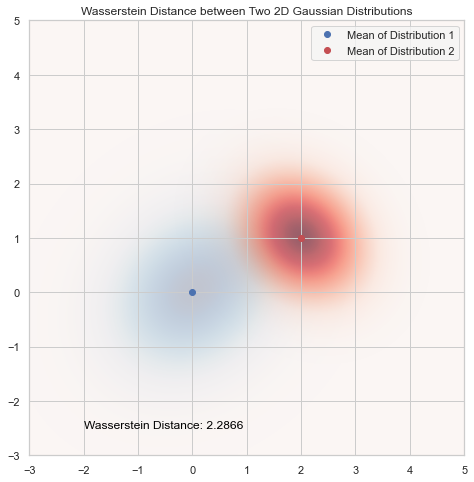

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.linalg import sqrtm

# Parameters for the first 2D Gaussian distribution
mean1 = [0, 0]
cov1 = np.array([[1, 0.2], [0.2, 1]])

# Parameters for the second 2D Gaussian distribution
mean2 = [2, 1]
cov2 = np.array([[0.5, -0.1], [-0.1, 0.5]])

# Create a grid for visualization
x, y = np.mgrid[-3:5:.05, -3:5:.05]
pos = np.dstack((x, y))

# Evaluate the Gaussian distributions on the grid
rv1 = multivariate_normal(mean1, cov1)
rv2 = multivariate_normal(mean2, cov2)
z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)

# Compute Wasserstein-2 Distance
mean_diff = np.linalg.norm(np.array(mean1) - np.array(mean2))

try:
    # Compute the square root of cov1
    cov1_sqrt = sqrtm(cov1)
    if np.iscomplexobj(cov1_sqrt):
        cov1_sqrt = cov1_sqrt.real  # Remove small imaginary components
    
    # Compute middle term
    cov_mid = np.dot(cov1_sqrt, np.dot(cov2, cov1_sqrt))
    cov_mid_sqrt = sqrtm(cov_mid)
    if np.iscomplexobj(cov_mid_sqrt):
        cov_mid_sqrt = cov_mid_sqrt.real  # Remove small imaginary components
    
    # Trace term calculation
    trace_term = np.trace(cov1 + cov2 - 2 * cov_mid_sqrt)
    wasserstein_dist = np.sqrt(mean_diff**2 + trace_term)
except Exception as e:
    print("Error in Wasserstein distance calculation:", e)
    wasserstein_dist = np.nan

# Plotting the 2D Gaussian distributions as "filled sets"
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the first distribution with imshow
ax.imshow(
    z1.T, 
    extent=(-3, 5, -3, 5), 
    origin='lower', 
    cmap='Blues', 
    alpha=0.6, 
    interpolation='bilinear'
)

# Plot the second distribution with imshow
ax.imshow(
    z2.T, 
    extent=(-3, 5, -3, 5), 
    origin='lower', 
    cmap='Reds', 
    alpha=0.6, 
    interpolation='bilinear'
)

# Plot means
ax.plot(*mean1, 'bo', label='Mean of Distribution 1')
ax.plot(*mean2, 'ro', label='Mean of Distribution 2')

# Annotate Wasserstein Distance
ax.text(-2, -2.5, f'Wasserstein Distance: {wasserstein_dist:.4f}', fontsize=12, color='black')

plt.title('Wasserstein Distance between Two 2D Gaussian Distributions')
plt.legend()
plt.show()


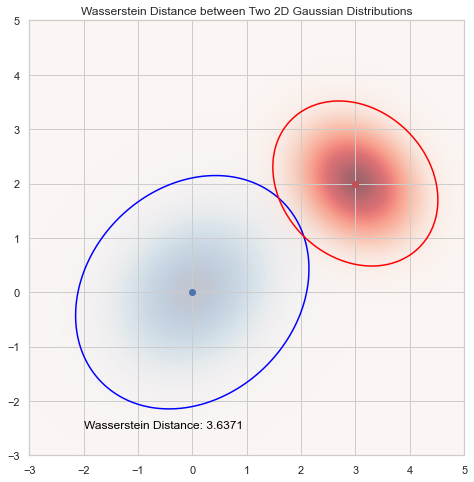

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.linalg import sqrtm

mean1 = [0, 0]
cov1 = np.array([[1, 0.2], [0.2, 1]])

mean2 = [3, 2]
cov2 = np.array([[0.5, -0.1], [-0.1, 0.5]])

x, y = np.mgrid[-3:5:.05, -3:5:.05]
pos = np.dstack((x, y))

rv1 = multivariate_normal(mean1, cov1)
rv2 = multivariate_normal(mean2, cov2)
z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)

mean_diff = np.linalg.norm(np.array(mean1) - np.array(mean2))


cov1_sqrt = sqrtm(cov1)
if np.iscomplexobj(cov1_sqrt):
    cov1_sqrt = cov1_sqrt.real  # Remove errors

cov_mid = np.dot(cov1_sqrt, np.dot(cov2, cov1_sqrt))
cov_mid_sqrt = sqrtm(cov_mid)
if np.iscomplexobj(cov_mid_sqrt):
    cov_mid_sqrt = cov_mid_sqrt.real  # Remove errors

trace_term = np.trace(cov1 + cov2 - 2 * cov_mid_sqrt)
wasserstein_dist = np.sqrt(mean_diff**2 + trace_term)

fig, ax = plt.subplots(figsize=(10, 8))

# Plot ditributions
ax.imshow(
    z1.T, 
    extent=(-3, 5, -3, 5), 
    origin='lower', 
    cmap='Blues', 
    alpha=0.6, 
    interpolation='bilinear'
)

ax.imshow(
    z2.T, 
    extent=(-3, 5, -3, 5), 
    origin='lower', 
    cmap='Reds', 
    alpha=0.6, 
    interpolation='bilinear'
)

# Add one contour on the boundary of each distribution
contour_level_1 = np.max(z1) * 0.1  
contour_level_2 = np.max(z2) * 0.1  

ax.contour(
    x, y, z1, 
    levels=[contour_level_1], 
    colors='blue', 
    linewidths=1.5,
)

ax.contour(
    x, y, z2, 
    levels=[contour_level_2], 
    colors='red', 
    linewidths=1.5,
)

# Plot means
ax.plot(*mean1, 'bo', label='Mean of Distribution 1')
ax.plot(*mean2, 'ro', label='Mean of Distribution 2')

# Annotate Wasserstein Distance
ax.text(-2, -2.5, f'Wasserstein Distance: {wasserstein_dist:.4f}', fontsize=12, color='black')

plt.title('Wasserstein Distance between Two 2D Gaussian Distributions')
plt.show()
